**1. Compute the graph of the computed metrics of the model with 15 epochs and 6 epochs**

['bert-base-uncased', 'Bert_Base_Uncased_Donadieu_Lam.ipynb', 'Completed_testing.jsonlines', 'data', 'Fichier_Mustapha.ipynb', 'Graph_Computed_Metrics.ipynb', 'ner_results_labeled.jsonlines', 'plots', 'README.md', 'results', 'saved_model_bert']


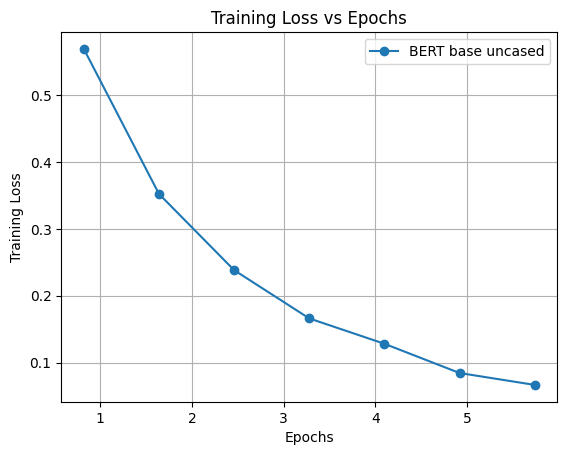

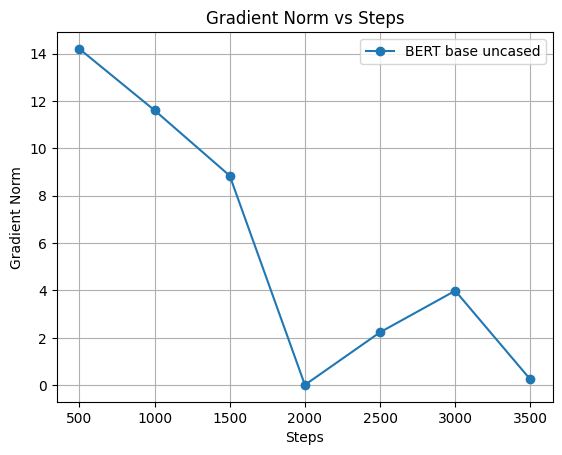

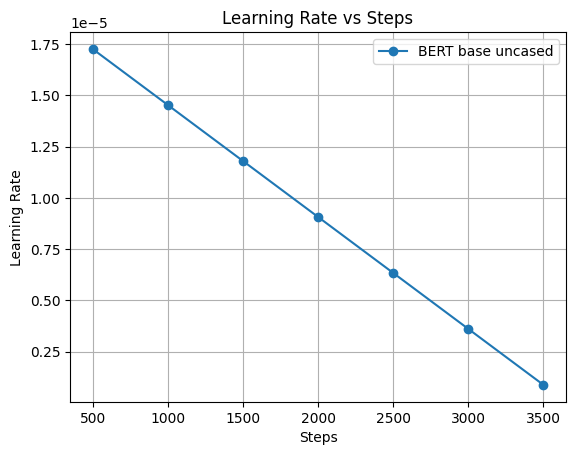

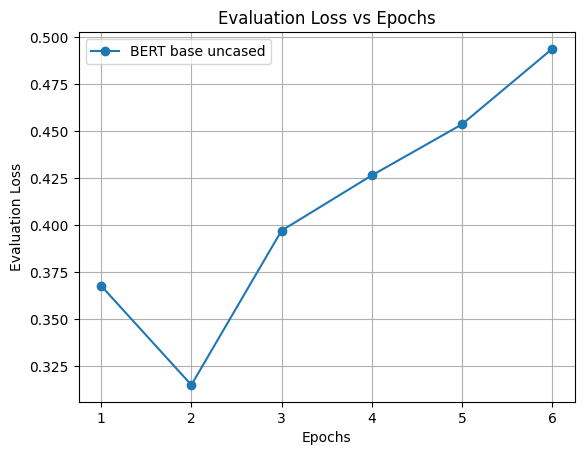

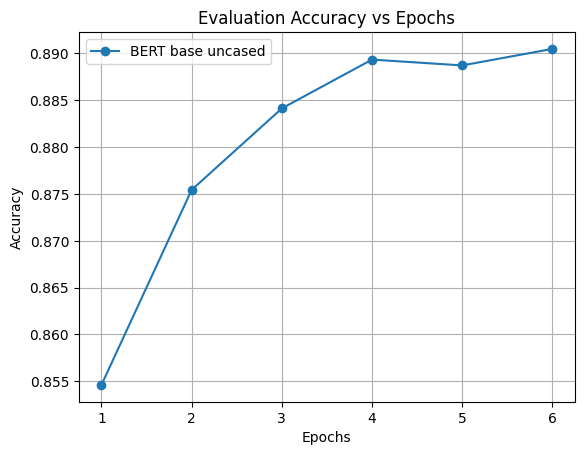

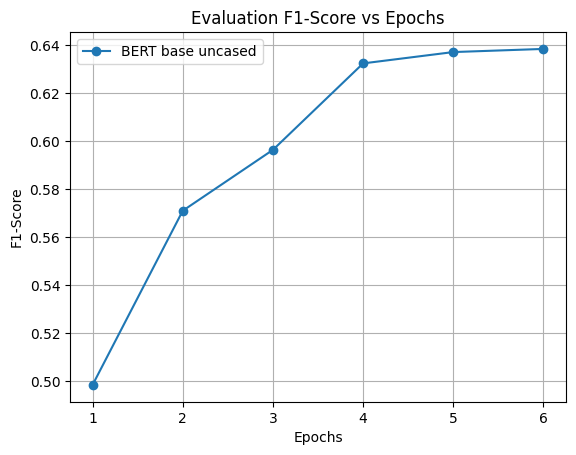

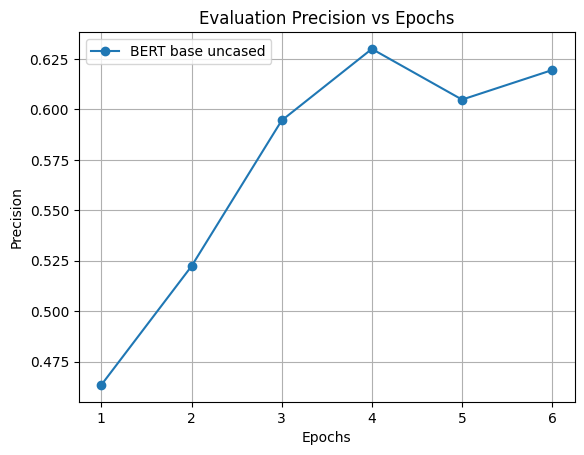

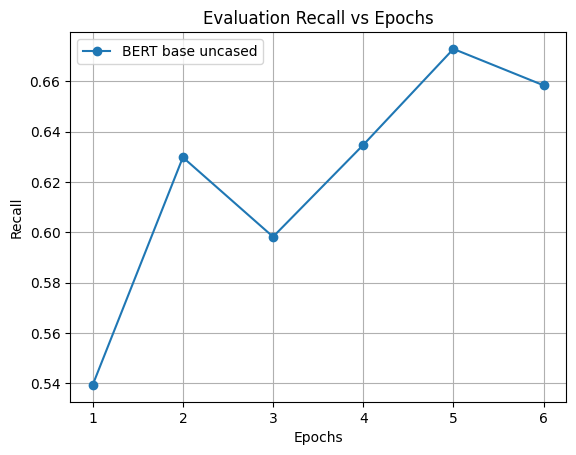

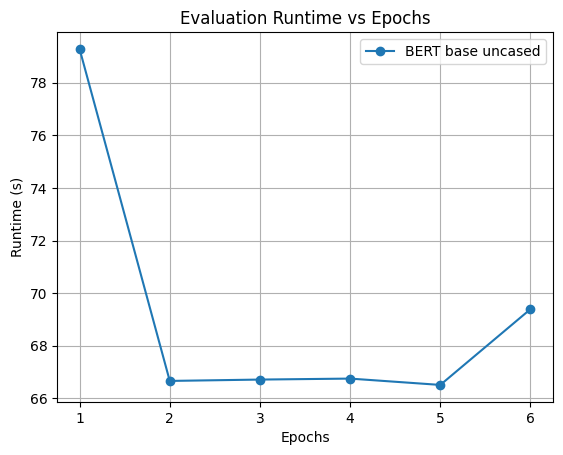

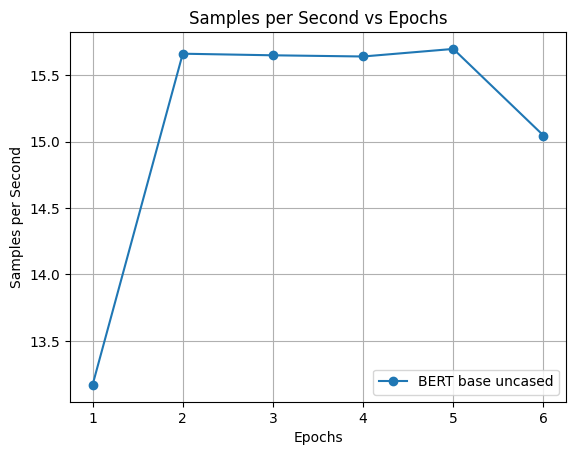

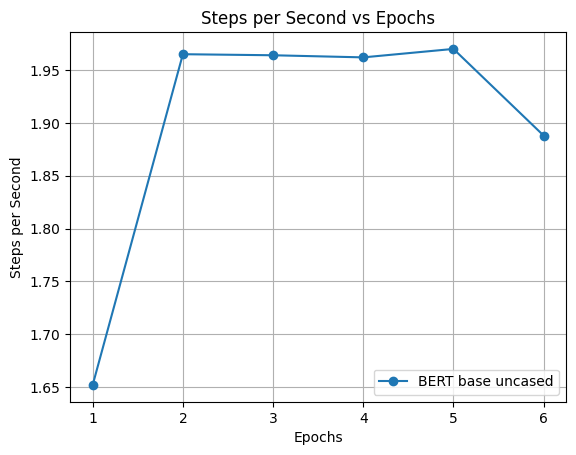

In [1]:
import json
import matplotlib.pyplot as plt
import os

os.chdir("C:/Users/nicov/OneDrive/Bureau/IPSA/Aero 5/Ma513 - Machine Learning For CyberSecurity/NER_Project")
print(os.listdir())

# Load the data
with open('bert-base-uncased/checkpoint-3660/trainer_state.json', 'r') as file:
    bert_base_uncased = json.load(file)

log_history_bert = bert_base_uncased['log_history']

# Extract data from BERT base uncased
grad_norm_bert = [entry.get('grad_norm') for entry in log_history_bert if 'grad_norm' in entry]
learning_rate_bert = [entry.get('learning_rate') for entry in log_history_bert if 'learning_rate' in entry]
loss_bert = [entry.get('loss') for entry in log_history_bert if 'loss' in entry]

epochs_bert = [entry.get('epoch') for entry in log_history_bert if 'eval_f1' in entry]
epochs_bis_bert = [entry.get('epoch') for entry in log_history_bert if 'step' in entry and entry["step"] % 500 == 0]
steps_bert = [entry.get('step') for entry in log_history_bert if 'step' in entry and entry["step"] % 500 == 0]

eval_accuracy_bert = [entry.get('eval_accuracy') for entry in log_history_bert if 'eval_accuracy' in entry]
eval_f1_bert = [entry.get('eval_f1') for entry in log_history_bert if 'eval_f1' in entry]
eval_loss_bert = [entry.get('eval_loss') for entry in log_history_bert if 'eval_loss' in entry]
eval_precision_bert = [entry.get('eval_precision') for entry in log_history_bert if 'eval_precision' in entry]
eval_recall_bert = [entry.get('eval_recall') for entry in log_history_bert if 'eval_recall' in entry]
eval_runtime_bert = [entry.get('eval_runtime') for entry in log_history_bert if 'eval_runtime' in entry]
eval_samples_per_second_bert = [entry.get('eval_samples_per_second') for entry in log_history_bert if 'eval_samples_per_second' in entry]
eval_steps_per_second_bert = [entry.get('eval_steps_per_second') for entry in log_history_bert if 'eval_steps_per_second' in entry]

# Create a folder to save the plots
output_folder = "plots_6_epoch"
os.makedirs(output_folder, exist_ok=True)

# Function to plot metrics
def plot_metric(x, y, xlabel, ylabel, title, filename):
    plt.figure()
    plt.plot(x, y, marker='o', label="BERT base uncased")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    filepath = os.path.join(output_folder, filename + ".png")
    plt.savefig(filepath)
    plt.show()

# Plot 1: Training Loss vs Steps
plot_metric(epochs_bis_bert, loss_bert, 'Epochs', 'Training Loss', "Training Loss vs Epochs", 'train_loss_epochs')

# Plot 2: Gradient Norm vs Steps
plot_metric(steps_bert, grad_norm_bert, 'Steps', 'Gradient Norm', "Gradient Norm vs Steps", 'grad_norm_steps')

# Plot 3: Learning Rate vs Steps
plot_metric(steps_bert, learning_rate_bert, 'Steps', 'Learning Rate', "Learning Rate vs Steps", 'learning_rate_steps')

# Plot 4: Evaluation Loss vs Epochs
plot_metric(epochs_bert, eval_loss_bert, 'Epochs', 'Evaluation Loss', "Evaluation Loss vs Epochs", 'eval_loss_epochs')

# Plot 5: Evaluation Accuracy vs Epochs
plot_metric(epochs_bert, eval_accuracy_bert, 'Epochs', 'Accuracy', "Evaluation Accuracy vs Epochs", 'eval_accuracy_epochs')

# Plot 6: Evaluation F1-Score vs Epochs
plot_metric(epochs_bert, eval_f1_bert, 'Epochs', 'F1-Score', "Evaluation F1-Score vs Epochs", 'eval_f1_epochs')

# Plot 7: Evaluation Precision vs Epochs
plot_metric(epochs_bert, eval_precision_bert, 'Epochs', 'Precision', "Evaluation Precision vs Epochs", 'eval_precision_epochs')

# Plot 8: Evaluation Recall vs Epochs
plot_metric(epochs_bert, eval_recall_bert, 'Epochs', 'Recall', "Evaluation Recall vs Epochs", 'eval_recall_epochs')

# Plot 9: Evaluation Runtime vs Epochs
plot_metric(epochs_bert, eval_runtime_bert, 'Epochs', 'Runtime (s)', "Evaluation Runtime vs Epochs", 'eval_runtime_epochs')

# Plot 10: Samples per Second vs Epochs
plot_metric(epochs_bert, eval_samples_per_second_bert, 'Epochs', 'Samples per Second', "Samples per Second vs Epochs", 'samples_per_second_epochs')

# Plot 11: Steps per Second vs Epochs
plot_metric(epochs_bert, eval_steps_per_second_bert, 'Epochs', 'Steps per Second', "Steps per Second vs Epochs", 'steps_per_second_epochs')
